# Challenge - Validating a Linear Regression

###### Import modules and ignore harmless seaborn warnings

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn import preprocessing as preproc
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

###### Build DataFrames from csv files

In [3]:
ma_2013 = 'https://raw.githubusercontent.com/djrgit/coursework/master/thinkful/data_science/my_progress/unit_2_supervised_learning/table_8_offenses_known_to_law_enforcement_massachusetts_by_city_2013.csv'
nj_2013 = 'https://raw.githubusercontent.com/djrgit/coursework/master/thinkful/data_science/my_progress/unit_2_supervised_learning/table_8_offenses_known_to_law_enforcement_new_jersey_by_city_2013.csv'
ny_2013 = 'https://raw.githubusercontent.com/djrgit/coursework/master/thinkful/data_science/my_progress/unit_2_supervised_learning/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv'
ny_2014 = 'https://raw.githubusercontent.com/djrgit/coursework/master/thinkful/data_science/my_progress/unit_2_supervised_learning/Table_8_Offenses_Known_to_Law_Enforcement_by_New_York_by_City_2014.csv'

# 2013 - Massachusetts
df_ma_2013 = pd.read_csv(ma_2013, skiprows=59)
df_ma_2013 = df_ma_2013[:279]

# 2013 - New Jersey
df_nj_2013 = pd.read_csv(nj_2013, skiprows=59)
df_nj_2013 = df_nj_2013[:479]

# 2013 - New York
df_ny_2013 = pd.read_csv(ny_2013, skiprows=59)
df_ny_2013 = df_ny_2013[:348]

# 2014 - New York
df_ny_2014 = pd.read_csv(ny_2014, skiprows=4)
df_ny_2014 = df_ny_2014[:369]

In [4]:
dfs = [df_ma_2013, df_nj_2013, df_ny_2013, df_ny_2014]

###### Preview the DataFrames before cleaning

In [5]:
df_ma_2013.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,manslaughter,definition)1,definition)2,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,theft,Unnamed: 12
0,Abington,16121.0,48.0,0.0,5.0,NaN,7.0,36.0,297.0,82.0,201.0,14.0,1.0
1,Acton,22871.0,8.0,0.0,1.0,NaN,2.0,5.0,178.0,31.0,144.0,3.0,0.0
2,Acushnet,10362.0,19.0,0.0,2.0,NaN,0.0,17.0,74.0,27.0,40.0,7.0,2.0
3,Adams,8352.0,21.0,0.0,3.0,NaN,3.0,15.0,157.0,40.0,109.0,8.0,1.0
4,Agawam,28659.0,41.0,0.0,12.0,NaN,3.0,26.0,270.0,105.0,130.0,35.0,1.0


In [6]:
df_nj_2013.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,manslaughter,definition)1,definition)2,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,theft,Unnamed: 12
0,Aberdeen Township,18150.0,19.0,0.0,NaN,0.0,13.0,6.0,237.0,42.0,185.0,10.0,0.0
1,Absecon,8380.0,21.0,0.0,NaN,2.0,4.0,15.0,266.0,91.0,169.0,6.0,0.0
2,Allendale,6712.0,0.0,0.0,NaN,0.0,0.0,0.0,37.0,6.0,29.0,2.0,0.0
3,Allenhurst,493.0,0.0,0.0,NaN,0.0,0.0,0.0,39.0,20.0,18.0,1.0,0.0
4,Allentown,1812.0,3.0,0.0,NaN,0.0,0.0,3.0,18.0,12.0,6.0,0.0,0.0


In [7]:
df_ny_2013.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,manslaughter,definition)1,definition)2,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,theft,Unnamed: 12
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [8]:
df_ny_2014.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,851",0,0.0,NaN,0.0,0,0,11,1,10,0,0.0
1,Addison Town and Village,"2,568",2,0.0,NaN,0.0,1,1,49,1,47,1,0.0
2,Afton Village4,820,0,0.0,0,NaN,0,0,1,0,1,0,0.0
3,Akron Village,"2,842",1,0.0,NaN,0.0,0,1,17,0,17,0,0.0
4,Albany4,"98,595",802,8.0,54,NaN,237,503,"3,888",683,"3,083",122,12.0


In [9]:
df_ma_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 13 columns):
Unnamed: 0      279 non-null object
Unnamed: 1      279 non-null float64
Unnamed: 2      279 non-null float64
manslaughter    279 non-null float64
definition)1    269 non-null float64
definition)2    10 non-null float64
Unnamed: 6      279 non-null float64
Unnamed: 7      279 non-null float64
Unnamed: 8      279 non-null float64
Unnamed: 9      279 non-null float64
Unnamed: 10     279 non-null float64
theft           279 non-null float64
Unnamed: 12     269 non-null float64
dtypes: float64(12), object(1)
memory usage: 28.4+ KB


In [10]:
df_nj_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 13 columns):
Unnamed: 0      479 non-null object
Unnamed: 1      479 non-null float64
Unnamed: 2      479 non-null float64
manslaughter    479 non-null float64
definition)1    0 non-null float64
definition)2    479 non-null float64
Unnamed: 6      479 non-null float64
Unnamed: 7      479 non-null float64
Unnamed: 8      479 non-null float64
Unnamed: 9      479 non-null float64
Unnamed: 10     479 non-null float64
theft           479 non-null float64
Unnamed: 12     479 non-null float64
dtypes: float64(12), object(1)
memory usage: 48.7+ KB


In [11]:
df_ny_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 13 columns):
Unnamed: 0      348 non-null object
Unnamed: 1      348 non-null float64
Unnamed: 2      348 non-null float64
manslaughter    348 non-null float64
definition)1    0 non-null float64
definition)2    348 non-null float64
Unnamed: 6      348 non-null float64
Unnamed: 7      348 non-null float64
Unnamed: 8      348 non-null float64
Unnamed: 9      348 non-null float64
Unnamed: 10     348 non-null float64
theft           348 non-null float64
Unnamed: 12     187 non-null float64
dtypes: float64(12), object(1)
memory usage: 35.4+ KB


In [12]:
df_ny_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 13 columns):
City                                    369 non-null object
Population                              369 non-null object
Violent
crime                           369 non-null object
Murder and
nonnegligent
manslaughter    369 non-null float64
Rape
(revised
definition)1              227 non-null object
Rape
(legacy
definition)2               142 non-null float64
Robbery                                 369 non-null object
Aggravated
assault                      369 non-null object
Property
crime                          368 non-null object
Burglary                                369 non-null object
Larceny-
theft                          368 non-null object
Motor
vehicle
theft                     369 non-null object
Arson3                                  365 non-null float64
dtypes: float64(3), object(10)
memory usage: 37.6+ KB


###### Clean the data

In [13]:
def floatify(x):
    try:
        if ',' in str(x):
            x = x.replace(',', '')
        x = float(x)
    except ValueError:
        x = None
    return x

In [14]:
def clean_df(df):
    
    # Rename columns
    df.columns = ['City', 'Population', 'Violent_crime', 'Murder', 'Rape_def1', 
                  'Rape_def2', 'Robbery', 'Agg_assault', 'Prop_crime', 'Burglary', 
                  'Larceny_theft', 'Mot_vehicle_theft', 'Arson']
    
    # Ensure numerical data is treated as such
    for col in df.columns:
        if col != 'City':
            df[col] = df[col].apply(floatify)
        
    return df

In [15]:
for df in dfs:
    clean_df(df)

In [16]:
# Drop columns for multiple states/years with many null values
df_ma_2013 = df_ma_2013.drop(columns=['Rape_def1', 'Rape_def2'])
df_nj_2013 = df_nj_2013.drop(columns=['Rape_def1', 'Rape_def2'])
df_ny_2013 = df_ny_2013.drop(columns=['Rape_def1', 'Rape_def2'])
df_ny_2014 = df_ny_2014.drop(columns=['Rape_def1', 'Rape_def2'])

###### Gather some basic statistical data for columns with numerical data

In [17]:
df_ma_2013.describe()

,Population,Violent_crime,Murder,Robbery,Agg_assault,Prop_crime,Burglary,Larceny_theft,Mot_vehicle_theft,Arson
count,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,269.000000
mean,23137.921147,93.157706,0.476703,22.917563,62.526882,464.512545,105.935484,326.795699,31.781362,1.832714
std,44075.293489,359.063125,2.843394,125.348681,214.587454,1292.812379,282.830648,912.540657,124.441481,4.860545
min,911.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000
25%,7044.000000,7.000000,0.000000,0.000000,5.000000,65.500000,17.000000,44.000000,2.000000,0.000000
50%,13699.000000,19.000000,0.000000,2.000000,14.000000,175.000000,35.000000,118.000000,6.000000,0.000000
75%,25709.500000,48.500000,0.000000,7.000000,37.000000,400.500000,77.000000,286.500000,16.000000,2.000000
max,643799.000000,5037.000000,39.000000,1868.000000,2851.000000,17853.000000,3096.000000,13147.000000,1610.000000,56.000000


In [18]:
df_nj_2013.describe()

,Population,Violent_crime,Murder,Robbery,Agg_assault,Prop_crime,Burglary,Larceny_theft,Mot_vehicle_theft,Arson
count,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000
mean,17556.910230,47.407098,0.703549,23.077244,22.018789,323.008351,69.338205,226.638831,27.031315,1.083507
std,25179.212668,213.254026,5.619360,131.534269,79.018890,643.365923,155.785117,380.687208,152.196186,3.137924
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4807.500000,2.000000,0.000000,0.000000,1.000000,49.000000,10.000000,36.000000,1.000000,0.000000
50%,9613.000000,7.000000,0.000000,2.000000,4.000000,134.000000,26.000000,100.000000,4.000000,0.000000
75%,21432.500000,21.000000,0.000000,9.000000,12.000000,335.000000,60.000000,244.500000,13.500000,1.000000
max,278246.000000,3516.000000,112.000000,2433.000000,926.000000,8965.000000,2074.000000,3997.000000,2894.000000,34.000000


In [19]:
df_ny_2013.describe()

,Population,Violent_crime,Murder,Robbery,Agg_assault,Prop_crime,Burglary,Larceny_theft,Mot_vehicle_theft,Arson
count,3.480000e+02,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,187.000000
mean,4.003763e+04,201.594828,1.566092,72.902299,121.261494,792.606322,119.683908,637.017241,35.905172,1.871658
std,4.500374e+05,2815.268504,18.303673,1031.032873,1706.131730,7659.724746,924.948789,6346.054451,403.423826,10.693411
min,5.260000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.003000e+03,2.000000,0.000000,0.000000,1.000000,40.500000,6.000000,31.000000,0.000000,0.000000
50%,7.233500e+03,6.000000,0.000000,1.000000,4.000000,112.500000,17.500000,94.000000,2.000000,0.000000
75%,1.842750e+04,22.000000,0.000000,5.000000,14.000000,341.000000,51.250000,287.250000,7.000000,1.000000
max,8.396126e+06,52384.000000,335.000000,19170.000000,31767.000000,141971.000000,16606.000000,117931.000000,7434.000000,132.000000


In [20]:
df_ny_2014.describe()

,Population,Violent_crime,Murder,Robbery,Agg_assault,Prop_crime,Burglary,Larceny_theft,Mot_vehicle_theft,Arson
count,3.690000e+02,369.000000,369.000000,369.000000,369.000000,368.000000,369.000000,368.000000,369.000000,365.000000
mean,3.781482e+04,183.691057,1.452575,60.661247,112.005420,698.361413,100.899729,562.790761,34.317073,1.424658
std,4.411591e+05,2638.842310,17.693912,866.480865,1640.514852,7123.613877,855.103473,5869.850394,406.956766,7.995050
min,7.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.631000e+03,1.000000,0.000000,0.000000,0.000000,25.000000,4.000000,20.000000,0.000000,0.000000
50%,6.581000e+03,5.000000,0.000000,1.000000,3.000000,76.000000,12.000000,60.500000,2.000000,0.000000
75%,1.540800e+04,18.000000,0.000000,4.000000,12.000000,271.500000,39.000000,228.500000,6.000000,1.000000
max,8.473938e+06,50564.000000,333.000000,16581.000000,31460.000000,135747.000000,15916.000000,112107.000000,7724.000000,135.000000


In [21]:
df_ma_2013 = df_ma_2013[(df_ma_2013['Population'] < 250000) & (df_ma_2013['Prop_crime'] > 0)]
df_nj_2013 = df_nj_2013[(df_nj_2013['Population'] < 250000) & (df_nj_2013['Prop_crime'] > 0)]
df_ny_2013 = df_ny_2013[(df_ny_2013['Population'] < 250000) & (df_ny_2013['Prop_crime'] > 0)]
df_ny_2014 = df_ny_2014[(df_ny_2014['Population'] < 250000) & (df_ny_2014['Prop_crime'] > 0)]

In [22]:
sns.set_style('darkgrid')

###### How does property crime vary with population (in cities with fewer than 250,000 people)?

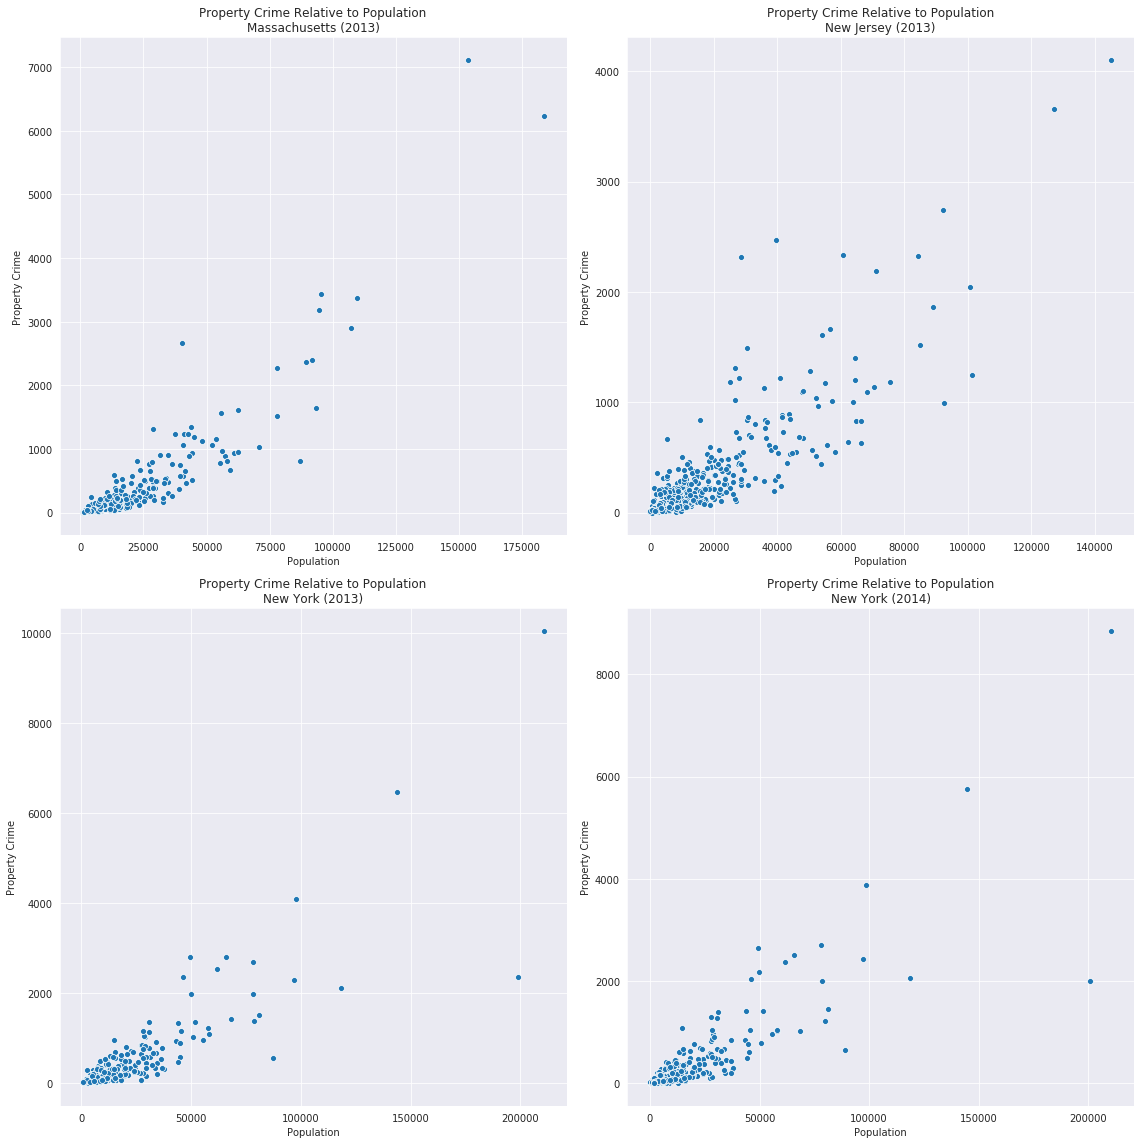

In [23]:
# Making a four-panel plot.
fig = plt.figure(figsize=(16,16))

fig.add_subplot(221)
sns.scatterplot(x='Population', y='Prop_crime', data=df_ma_2013)
plt.title('Property Crime Relative to Population\nMassachusetts (2013)')
plt.xlabel('Population')
plt.ylabel('Property Crime')

fig.add_subplot(222)
sns.scatterplot(x='Population', y='Prop_crime', data=df_nj_2013)
plt.title('Property Crime Relative to Population\nNew Jersey (2013)')
plt.xlabel('Population')
plt.ylabel('Property Crime')

fig.add_subplot(223)
sns.scatterplot(x='Population', y='Prop_crime', data=df_ny_2013)
plt.title('Property Crime Relative to Population\nNew York (2013)')
plt.xlabel('Population')
plt.ylabel('Property Crime')

fig.add_subplot(224)
sns.scatterplot(x='Population', y='Prop_crime', data=df_ny_2014)
plt.title('Property Crime Relative to Population\nNew York (2014)')
plt.xlabel('Population')
plt.ylabel('Property Crime')

plt.tight_layout()
plt.show()

###### How does murder vary with population (in cities with fewer than 250,000 people)?

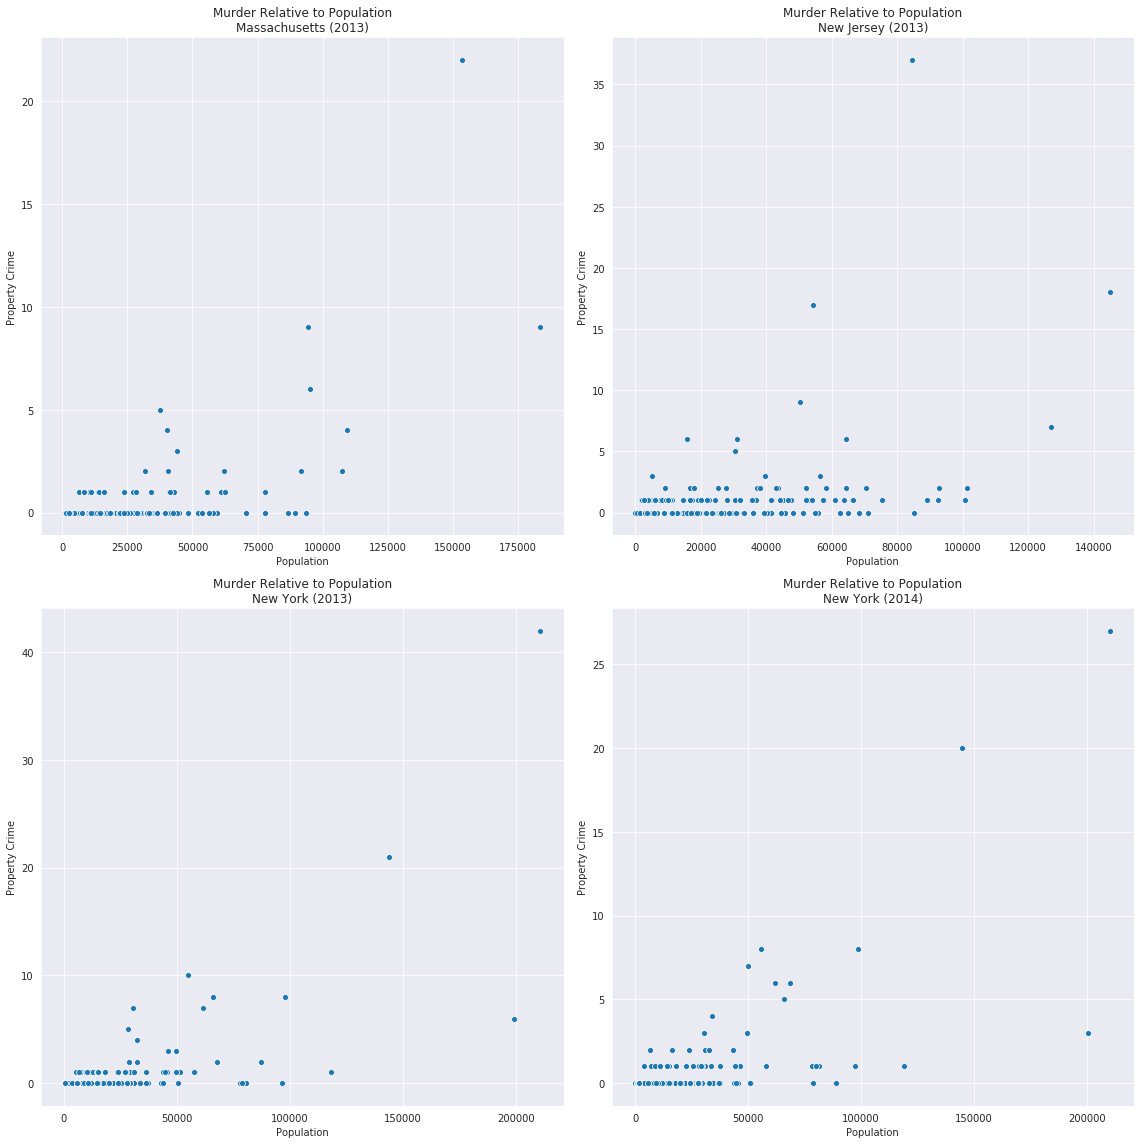

In [24]:
# Making a four-panel plot.
fig = plt.figure(figsize=(16,16))

fig.add_subplot(221)
sns.scatterplot(x='Population', y='Murder', data=df_ma_2013)
plt.title('Murder Relative to Population\nMassachusetts (2013)')
plt.xlabel('Population')
plt.ylabel('Property Crime')

fig.add_subplot(222)
sns.scatterplot(x='Population', y='Murder', data=df_nj_2013)
plt.title('Murder Relative to Population\nNew Jersey (2013)')
plt.xlabel('Population')
plt.ylabel('Property Crime')

fig.add_subplot(223)
sns.scatterplot(x='Population', y='Murder', data=df_ny_2013)
plt.title('Murder Relative to Population\nNew York (2013)')
plt.xlabel('Population')
plt.ylabel('Property Crime')

fig.add_subplot(224)
sns.scatterplot(x='Population', y='Murder', data=df_ny_2014)
plt.title('Murder Relative to Population\nNew York (2014)')
plt.xlabel('Population')
plt.ylabel('Property Crime')

plt.tight_layout()
plt.show()

###### How does robbery vary with population (in cities with fewer than 250,000 people)?

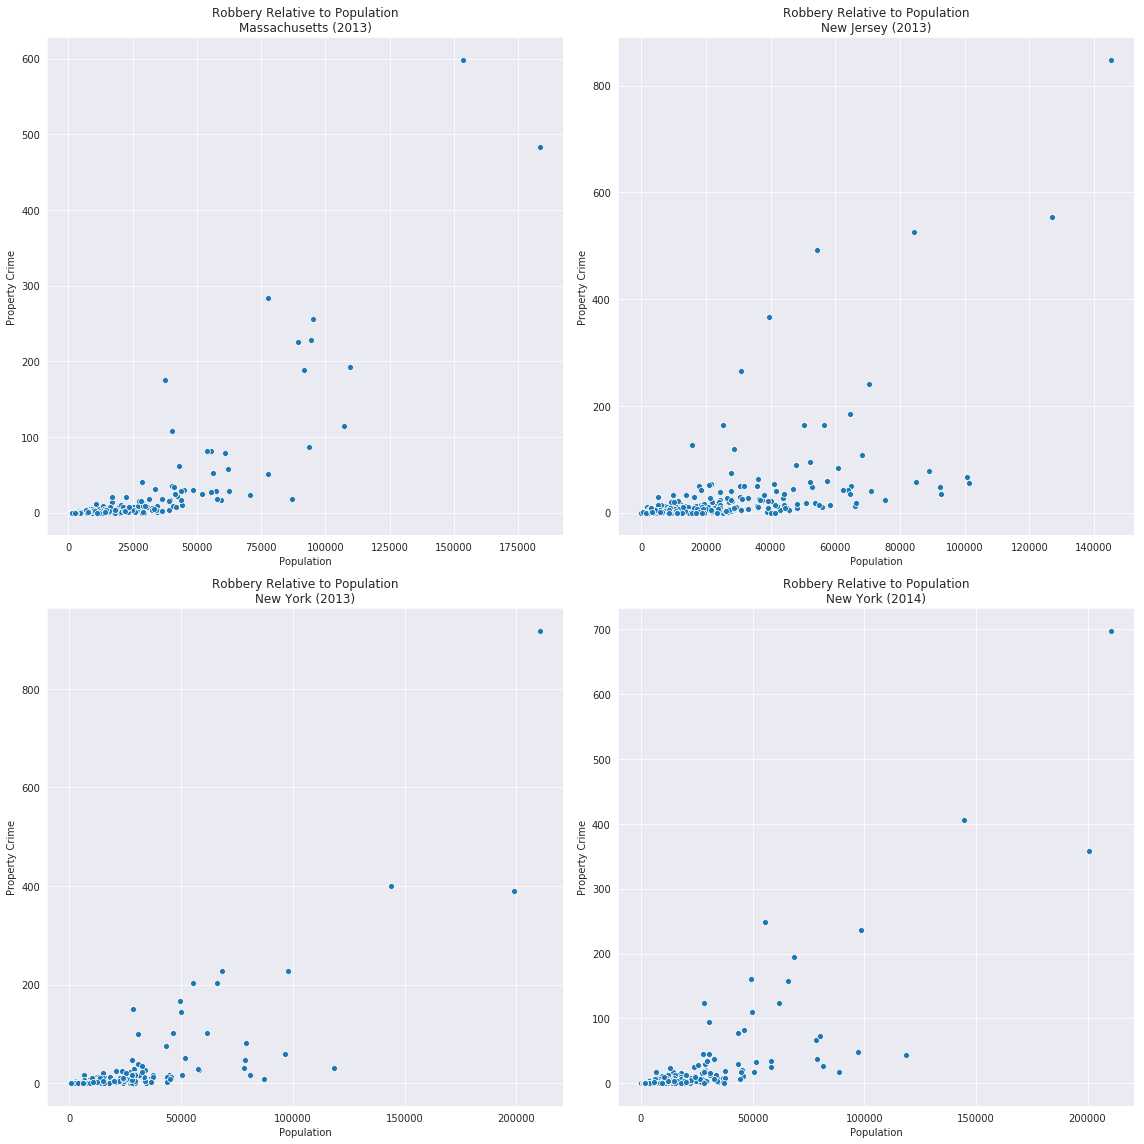

In [25]:
# Making a four-panel plot.
fig = plt.figure(figsize=(16,16))

fig.add_subplot(221)
sns.scatterplot(x='Population', y='Robbery', data=df_ma_2013)
plt.title('Robbery Relative to Population\nMassachusetts (2013)')
plt.xlabel('Population')
plt.ylabel('Property Crime')

fig.add_subplot(222)
sns.scatterplot(x='Population', y='Robbery', data=df_nj_2013)
plt.title('Robbery Relative to Population\nNew Jersey (2013)')
plt.xlabel('Population')
plt.ylabel('Property Crime')

fig.add_subplot(223)
sns.scatterplot(x='Population', y='Robbery', data=df_ny_2013)
plt.title('Robbery Relative to Population\nNew York (2013)')
plt.xlabel('Population')
plt.ylabel('Property Crime')

fig.add_subplot(224)
sns.scatterplot(x='Population', y='Robbery', data=df_ny_2014)
plt.title('Robbery Relative to Population\nNew York (2014)')
plt.xlabel('Population')
plt.ylabel('Property Crime')

plt.tight_layout()
plt.show()

###### Attempt to transform the property crime data for various states/years into a more normal distribution

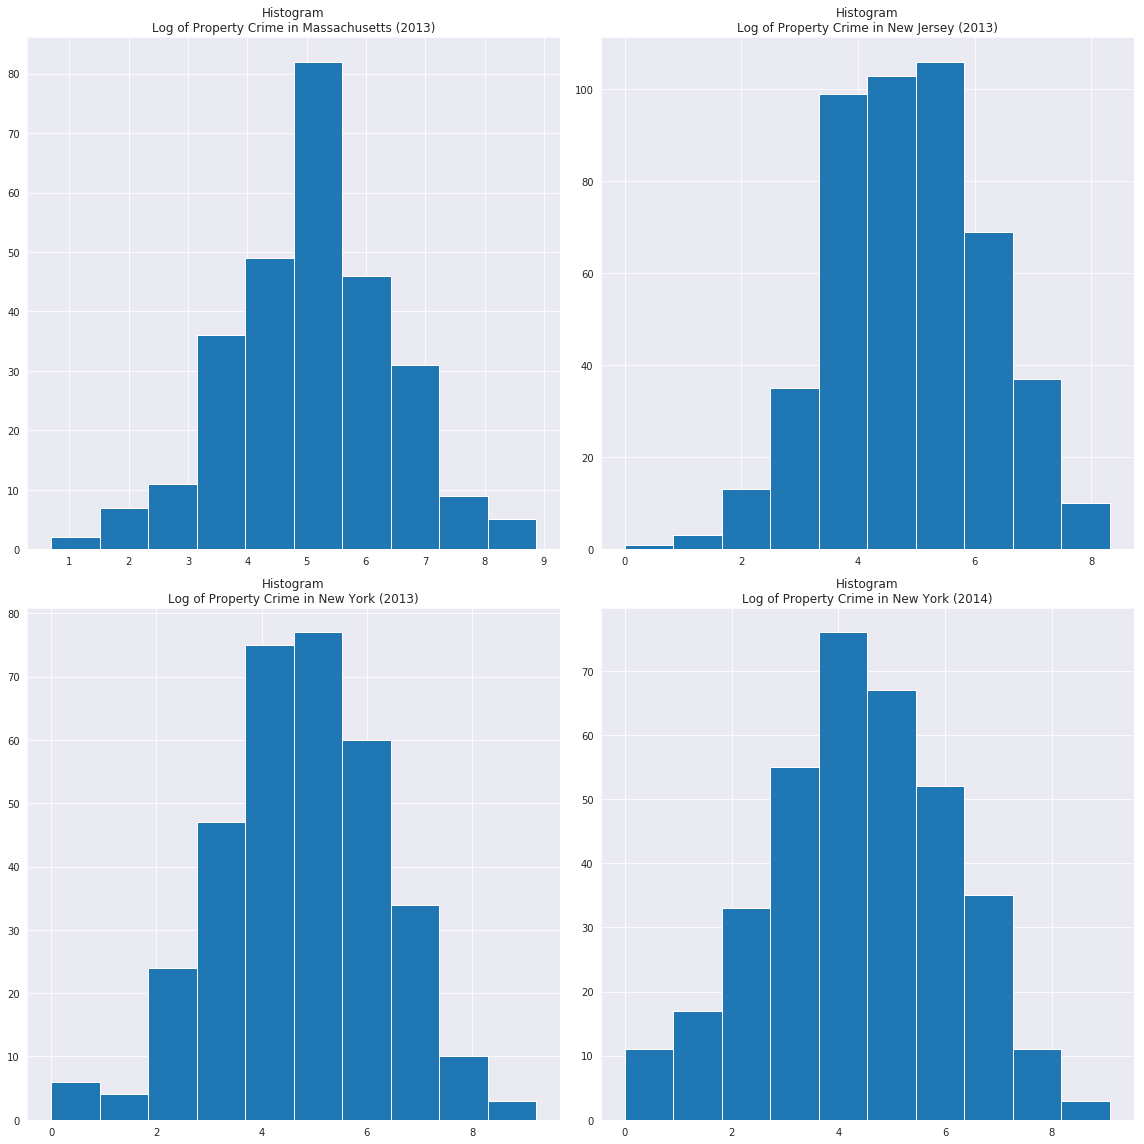

In [26]:
# Making a four-panel plot.
fig = plt.figure(figsize=(16,16))

fig.add_subplot(221)
plt.hist(np.log(df_ma_2013['Prop_crime']))
plt.title('Histogram\nLog of Property Crime in Massachusetts (2013)')

fig.add_subplot(222)
plt.hist(np.log(df_nj_2013['Prop_crime']))
plt.title('Histogram\nLog of Property Crime in New Jersey (2013)')

fig.add_subplot(223)
plt.hist(np.log(df_ny_2013['Prop_crime']))
plt.title('Histogram\nLog of Property Crime in New York (2013)')

fig.add_subplot(224)
plt.hist(np.log(df_ny_2014['Prop_crime']))
plt.title('Histogram\nLog of Property Crime in New York (2014)')

plt.tight_layout()
plt.show()

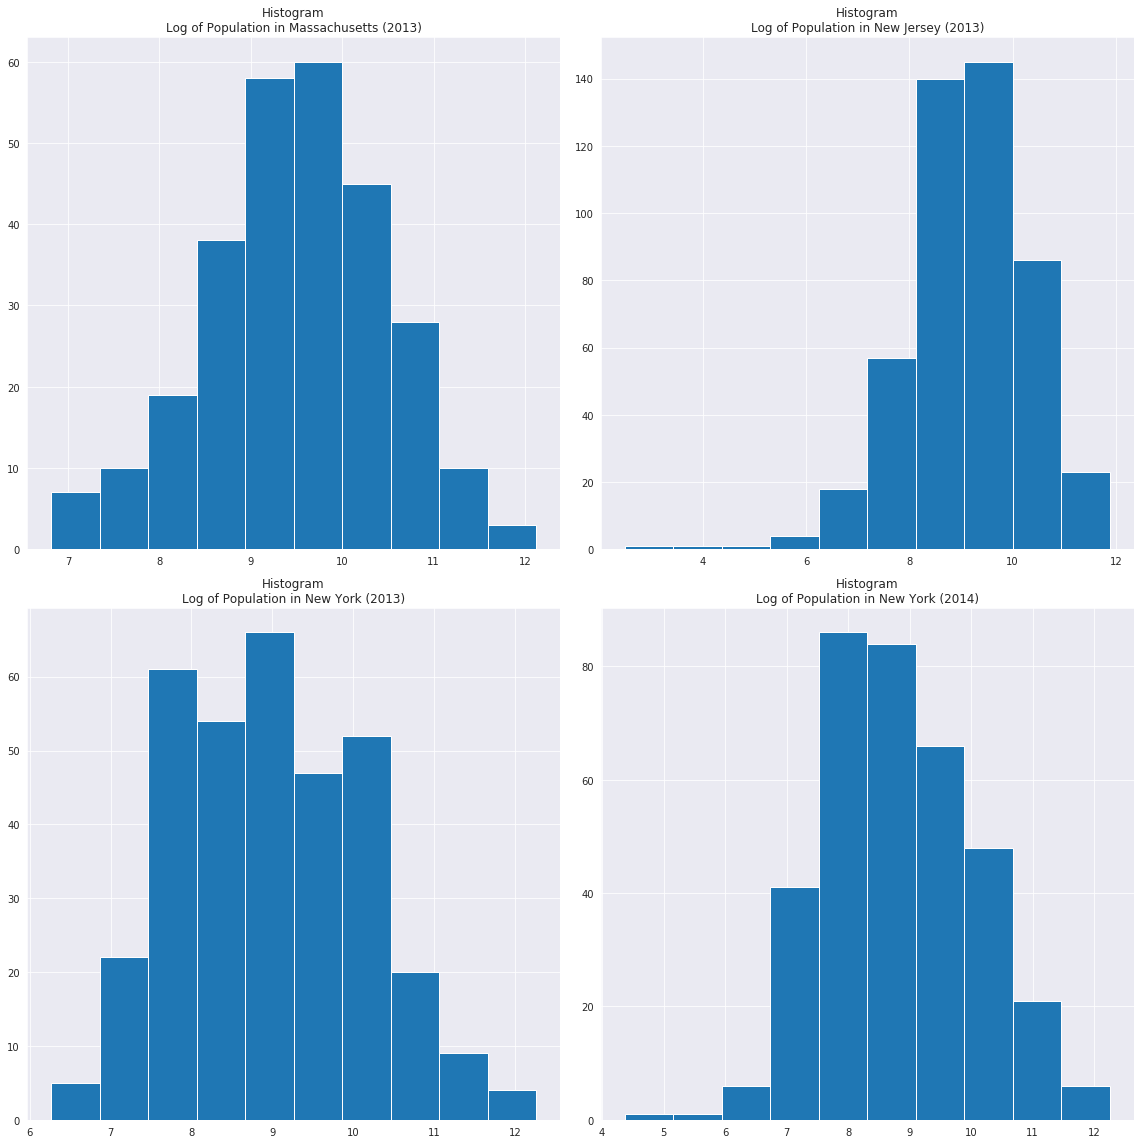

In [27]:
# Making a four-panel plot.
fig = plt.figure(figsize=(16,16))

fig.add_subplot(221)
plt.hist(np.log(df_ma_2013['Population']))
plt.title('Histogram\nLog of Population in Massachusetts (2013)')

fig.add_subplot(222)
plt.hist(np.log(df_nj_2013['Population']))
plt.title('Histogram\nLog of Population in New Jersey (2013)')

fig.add_subplot(223)
plt.hist(np.log(df_ny_2013['Population']))
plt.title('Histogram\nLog of Population in New York (2013)')

fig.add_subplot(224)
plt.hist(np.log(df_ny_2014['Population']))
plt.title('Histogram\nLog of Population in New York (2014)')

plt.tight_layout()
plt.show()

###### Construct model template

In [28]:
def build_model_df(df):
    model = df[['Prop_crime', 'Population']].copy()
    model['log_Prop_crime'] = np.log(model['Prop_crime'])
    model['log_Pop'] = np.log(model['Population'])
    model['Population^2'] = df['Population']**2
    model['minmax_Burglary'] = preproc.minmax_scale(df[['Burglary']])
    model['minmax_Murder'] = preproc.minmax_scale(df[['Murder']])
    model['minmax_Robbery'] = preproc.minmax_scale(df[['Robbery']])
    model['minmax_Larceny_theft'] = preproc.minmax_scale(df[['Larceny_theft']])    
    return model

###### Validate linear regression model

In [29]:
def validate_linear_reg(model, Xs, linear_formula):
    
    # Instantiate and fit our model.
    regr = linear_model.LinearRegression()
    y = model['log_Prop_crime'].values.reshape(-1, 1)
    X = model[Xs]
    regr.fit(X, y)

    # Inspect the results.
    #print('\nCoefficients: \n', regr.coef_)
    #print('\nIntercept: \n', regr.intercept_)
    #print('\nR-squared:')
    #print(regr.score(X, y))

    # Extract predicted values.
    predicted = regr.predict(X).ravel()
    actual = model['log_Prop_crime']

    # Calculate the error, also called the residual.
    residual = actual - predicted

    plt.hist(residual)
    plt.title('Residual counts')
    plt.xlabel('Residual')
    plt.ylabel('Count')
    plt.show()

    # Scedasticity
    plt.scatter(predicted, residual)
    plt.xlabel('Predicted')
    plt.ylabel('Residual')
    plt.axhline(y=0)
    plt.title('Residual vs. Predicted')
    plt.show()

    # Fit the model to our data using the formula.
    lm = smf.ols(formula=linear_formula, data=model).fit()
    
    print('Parameters (Intercept and Coefficients): ')
    print(lm.params)
    print('\n')
    print('p-values: ')
    print(lm.pvalues)
    print('\n')
    print('R-Squared: ')
    print(lm.rsquared)
    print('\n')
    print('Confidence Intervals: ')
    print(lm.conf_int())
    print('\n')
    print('Cross validation scores (5 folds): ')
    print(cross_val_score(regr, X, y, cv=5))

In [30]:
X_params = ['log_Pop', 'minmax_Burglary', 'minmax_Murder', 'minmax_Robbery', 'minmax_Larceny_theft']

In [31]:
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
lin_form = 'log_Prop_crime ~ ' + '+'.join(X_params)

###### Test validation function with DataFrames

Massachusetts - 2013


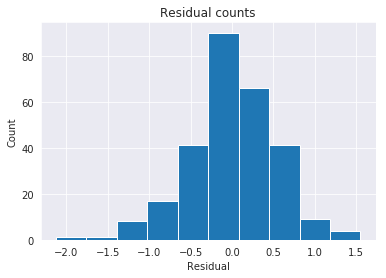

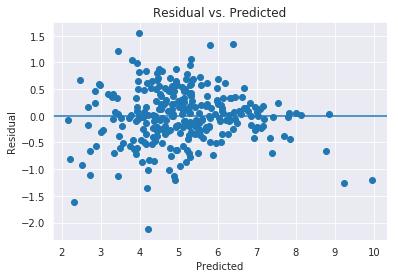

Parameters (Intercept and Coefficients): 
Intercept              -4.645797
log_Pop                 0.997791
minmax_Burglary         1.189119
minmax_Murder          -1.050813
minmax_Robbery         -3.328650
minmax_Larceny_theft    4.764627
dtype: float64


p-values: 
Intercept               1.134167e-24
log_Pop                 4.541298e-62
minmax_Burglary         3.520718e-01
minmax_Murder           2.494875e-01
minmax_Robbery          1.505546e-03
minmax_Larceny_theft    3.939279e-09
dtype: float64


R-Squared: 
0.8585064395710996


Confidence Intervals: 
                             0         1
Intercept            -5.452214 -3.839380
log_Pop               0.908201  1.087382
minmax_Burglary      -1.322257  3.700495
minmax_Murder        -2.843402  0.741777
minmax_Robbery       -5.372556 -1.284744
minmax_Larceny_theft  3.223139  6.306115


Cross validation scores (5 folds): 
[0.85768934 0.84786529 0.84038889 0.82785439 0.82559119]


In [32]:
print('Massachusetts - 2013')
validate_linear_reg(build_model_df(df_ma_2013), X_params, lin_form)

New Jersey - 2013


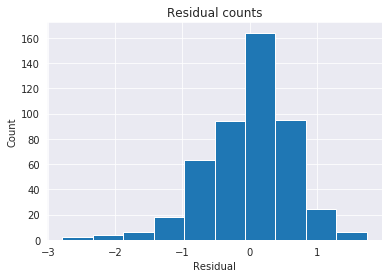

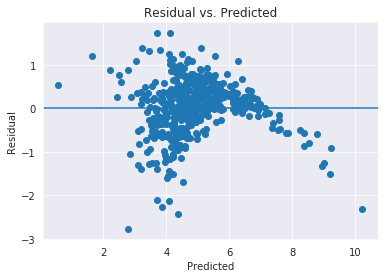

Parameters (Intercept and Coefficients): 
Intercept              -0.885488
log_Pop                 0.584686
minmax_Burglary         1.434364
minmax_Murder           1.378510
minmax_Robbery         -2.539234
minmax_Larceny_theft    3.987568
dtype: float64


p-values: 
Intercept               1.536914e-03
log_Pop                 1.322359e-56
minmax_Burglary         1.660503e-01
minmax_Murder           1.291243e-01
minmax_Robbery          4.171772e-03
minmax_Larceny_theft    1.619682e-18
dtype: float64


R-Squared: 
0.7700371666468011


Confidence Intervals: 
                             0         1
Intercept            -1.431576 -0.339401
log_Pop               0.521702  0.647670
minmax_Burglary      -0.597528  3.466256
minmax_Murder        -0.403323  3.160344
minmax_Robbery       -4.272375 -0.806093
minmax_Larceny_theft  3.132053  4.843082


Cross validation scores (5 folds): 
[0.72022372 0.8177723  0.81601903 0.73030571 0.66117824]


In [33]:
print('New Jersey - 2013')
validate_linear_reg(build_model_df(df_nj_2013), X_params, lin_form)

New York - 2013


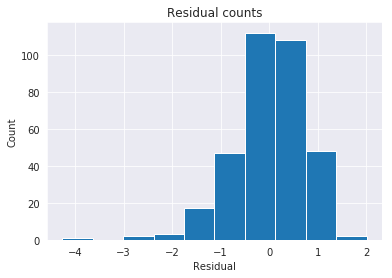

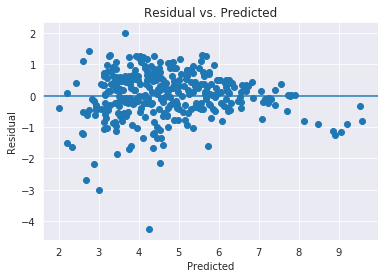

Parameters (Intercept and Coefficients): 
Intercept              -3.862686
log_Pop                 0.934918
minmax_Burglary         1.598001
minmax_Murder          -3.800892
minmax_Robbery         -2.865762
minmax_Larceny_theft    7.017756
dtype: float64


p-values: 
Intercept               6.404695e-18
log_Pop                 1.207538e-54
minmax_Burglary         5.111257e-01
minmax_Murder           5.817378e-02
minmax_Robbery          1.418993e-01
minmax_Larceny_theft    1.547641e-05
dtype: float64


R-Squared: 
0.7686384425401896


Confidence Intervals: 
                             0          1
Intercept            -4.694380  -3.030992
log_Pop               0.837549   1.032287
minmax_Burglary      -3.180745   6.376746
minmax_Murder        -7.734106   0.132322
minmax_Robbery       -6.694785   0.963260
minmax_Larceny_theft  3.870544  10.164968


Cross validation scores (5 folds): 
[0.72697228 0.67003865 0.69557902 0.80634742 0.75270767]


In [34]:
print('New York - 2013')
validate_linear_reg(build_model_df(df_ny_2013), X_params, lin_form)

New York - 2014


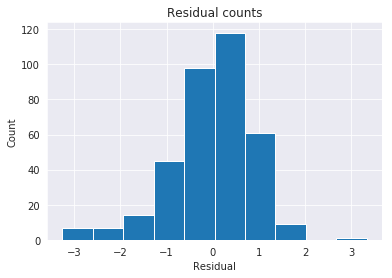

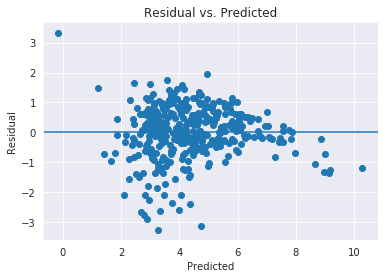

Parameters (Intercept and Coefficients): 
Intercept              -4.418970
log_Pop                 0.969038
minmax_Burglary         2.442718
minmax_Murder          -3.744700
minmax_Robbery         -3.008440
minmax_Larceny_theft    7.131701
dtype: float64


p-values: 
Intercept               1.228281e-20
log_Pop                 8.021972e-54
minmax_Burglary         4.007560e-01
minmax_Murder           6.030610e-02
minmax_Robbery          9.748233e-02
minmax_Larceny_theft    2.051460e-05
dtype: float64


R-Squared: 
0.7338576421450509


Confidence Intervals: 
                             0          1
Intercept            -5.294798  -3.543142
log_Pop               0.865858   1.072217
minmax_Burglary      -3.267667   8.153103
minmax_Murder        -7.652557   0.163157
minmax_Robbery       -6.569305   0.552426
minmax_Larceny_theft  3.883088  10.380315


Cross validation scores (5 folds): 
[0.72986513 0.70813774 0.55097756 0.70693402 0.74529073]


In [35]:
print('New York - 2014')
validate_linear_reg(build_model_df(df_ny_2014), X_params, lin_form)

### The p-values for 'minmax_Burglary' and 'minmax_Murder' are consistently higher than 0.05 for all datasets tested with this model, indicating that their inclusion in the model may not have much statistical significance with regards to predicting property crimes.  Additionally, the confidence intervals for these parameters also cross 0.0 in _all_ tested datasets.  

### These parameters may not add much to the model's explanatory power and can probably be removed.  Follow-up with this hypothesis by testing the new model (without the minmax_Burglary and minmax_Murder parameters) below.

In [36]:
# Removed 'minmax_Burglary' and 'minmax_Murder'
X_params2 = ['log_Pop', 'minmax_Robbery', 'minmax_Larceny_theft']

In [37]:
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
lin_form2 = 'log_Prop_crime ~ ' + '+'.join(X_params2)

Massachusetts - 2013


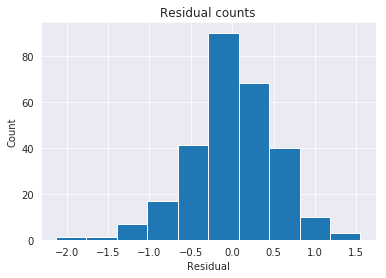

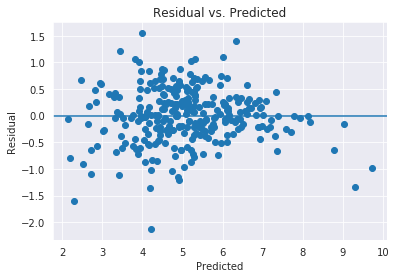

Parameters (Intercept and Coefficients): 
Intercept              -4.738298
log_Pop                 1.009101
minmax_Robbery         -3.263181
minmax_Larceny_theft    4.984505
dtype: float64


p-values: 
Intercept               2.554703e-26
log_Pop                 5.756877e-65
minmax_Robbery          1.785492e-05
minmax_Larceny_theft    1.037148e-11
dtype: float64


R-Squared: 
0.8576603495346455


Confidence Intervals: 
                             0         1
Intercept            -5.527630 -3.948966
log_Pop               0.921659  1.096542
minmax_Robbery       -4.734130 -1.792233
minmax_Larceny_theft  3.603511  6.365500


Cross validation scores (5 folds): 
[0.85919181 0.84912414 0.86069938 0.82685054 0.83733876]


In [38]:
print('Massachusetts - 2013')
validate_linear_reg(build_model_df(df_ma_2013), X_params2, lin_form2)

New Jersey - 2013


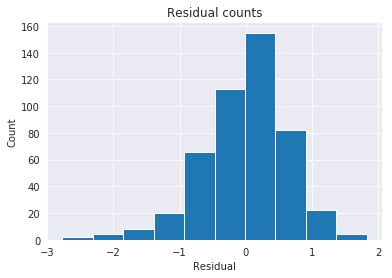

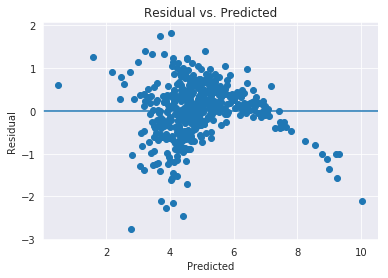

Parameters (Intercept and Coefficients): 
Intercept              -0.988076
log_Pop                 0.598425
minmax_Robbery         -0.622032
minmax_Larceny_theft    4.213489
dtype: float64


p-values: 
Intercept               3.858850e-04
log_Pop                 1.766282e-59
minmax_Robbery          2.024504e-01
minmax_Larceny_theft    3.175992e-36
dtype: float64


R-Squared: 
0.7667108874684496


Confidence Intervals: 
                             0         1
Intercept            -1.531130 -0.445023
log_Pop               0.536028  0.660822
minmax_Robbery       -1.579661  0.335597
minmax_Larceny_theft  3.609347  4.817631


Cross validation scores (5 folds): 
[0.7132296  0.82082237 0.81303717 0.72646686 0.70967467]


In [39]:
print('New Jersey - 2013')
validate_linear_reg(build_model_df(df_nj_2013), X_params2, lin_form2)

New York - 2013


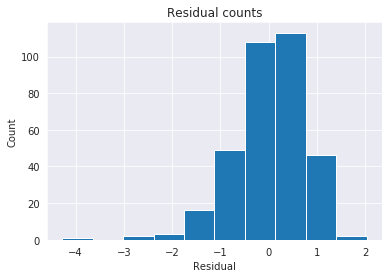

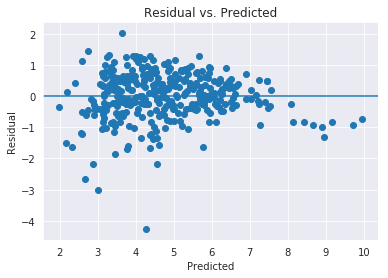

Parameters (Intercept and Coefficients): 
Intercept              -3.997613
log_Pop                 0.951924
minmax_Robbery         -5.030451
minmax_Larceny_theft    7.315982
dtype: float64


p-values: 
Intercept               3.798949e-20
log_Pop                 2.318414e-59
minmax_Robbery          2.334673e-05
minmax_Larceny_theft    2.609433e-10
dtype: float64


R-Squared: 
0.7661254443230614


Confidence Intervals: 
                             0         1
Intercept            -4.799084 -3.196142
log_Pop               0.858528  1.045320
minmax_Robbery       -7.336780 -2.724122
minmax_Larceny_theft  5.108129  9.523834


Cross validation scores (5 folds): 
[0.76617113 0.66637997 0.70043483 0.79961937 0.76662069]


In [40]:
print('New York - 2013')
validate_linear_reg(build_model_df(df_ny_2013), X_params2, lin_form2)

New York - 2013


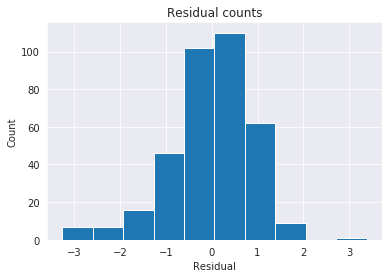

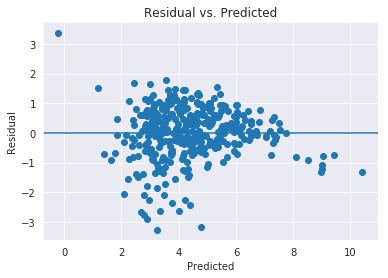

Parameters (Intercept and Coefficients): 
Intercept              -4.521905
log_Pop                 0.982583
minmax_Robbery         -4.629079
minmax_Larceny_theft    7.521094
dtype: float64


p-values: 
Intercept               1.324516e-22
log_Pop                 8.238327e-58
minmax_Robbery          6.368386e-05
minmax_Larceny_theft    1.140701e-10
dtype: float64


R-Squared: 
0.731168560882208


Confidence Intervals: 
                             0         1
Intercept            -5.369844 -3.673965
log_Pop               0.883088  1.082078
minmax_Robbery       -6.878622 -2.379536
minmax_Larceny_theft  5.295072  9.747115


Cross validation scores (5 folds): 
[0.76879891 0.70774259 0.59606939 0.70812605 0.73952432]


In [41]:
print('New York - 2013')
validate_linear_reg(build_model_df(df_ny_2014), X_params2, lin_form2)